In [18]:
# Import Required Libraries
import pandas as pd
import random
import numpy as np

In [11]:
# Number of data points
n = 10000

# Simulate data collection
def generate_data(n):
    data = {
        'Humidity (%)': [],
        'Nitrogen Levels (mg/kg)': [],
        'Ambient Temperature (°C)': [],
        'Presence of Sunlight': [],
        'Plant Health': []
    }
    
    # Generate a third of the data for each category
    for category in ['Healthy', 'Moderate', 'Unhealthy']:
        for _ in range(n // 3):
            if category == 'Healthy':
                data['Humidity (%)'].append(random.uniform(50, 70))
                data['Nitrogen Levels (mg/kg)'].append(random.uniform(100, 150))
                data['Ambient Temperature (°C)'].append(random.uniform(15, 25))
                data['Presence of Sunlight'].append(1)
                data['Plant Health'].append('Healthy')
            elif category == 'Moderate':
                data['Humidity (%)'].append(random.uniform(40, 80))
                data['Nitrogen Levels (mg/kg)'].append(random.uniform(80, 170))
                data['Ambient Temperature (°C)'].append(random.uniform(10, 30))
                data['Presence of Sunlight'].append(random.choice([0, 1]))
                data['Plant Health'].append('Moderate')
            else:
                data['Humidity (%)'].append(random.uniform(0, 100))
                data['Nitrogen Levels (mg/kg)'].append(random.uniform(0, 200))
                data['Ambient Temperature (°C)'].append(random.uniform(-10, 40))
                data['Presence of Sunlight'].append(random.choice([0, 1]))
                data['Plant Health'].append('Unhealthy')
    
    # Create a DataFrame and shuffle it
    df = pd.DataFrame(data)
    df = df.sample(frac=1).reset_index(drop=True)
    
    return df

df = generate_data(n)

In [12]:
df.head(10)

,Humidity (%),Nitrogen Levels (mg/kg),Ambient Temperature (°C),Presence of Sunlight,Plant Health
0,61.007023,106.570495,21.414754,1,Healthy
1,42.251923,105.055392,7.605900,1,Unhealthy
2,65.097840,131.149047,17.135974,1,Moderate
3,21.899921,61.570871,8.722462,1,Unhealthy
4,75.594563,114.994719,19.645491,0,Moderate
5,45.335695,153.796877,23.698207,0,Moderate
6,55.206591,144.193022,23.672102,1,Healthy
7,46.653394,86.707641,21.273833,1,Moderate
8,50.268045,104.892462,26.784364,1,Moderate
9,65.283096,100.781619,15.263113,1,Healthy


In [13]:
# Save to CSV
#df.to_csv('plant_health_dataset.csv', index=False)

In [2]:
# Read CSV
df = pd.read_csv('plant_health_dataset.csv')

### **Building Neural Networks**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode the labels
le = LabelEncoder()
df['Plant Health'] = le.fit_transform(df['Plant Health'])

In [4]:
# Split the data into training and testing sets
X = df.drop('Plant Health', axis=1)
y = df['Plant Health']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Normalize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Import required libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [10]:
# Build a neural network using a library like TensorFlow
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.8189 - accuracy: 0.6248 - val_loss: 0.5595 - val_accuracy: 0.7731
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.7565 - val_loss: 0.4221 - val_accuracy: 0.8581
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.8053 - val_loss: 0.3607 - val_accuracy: 0.8800
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.8329 - val_loss: 0.3260 - val_accuracy: 0.8994
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8420 - val_loss: 0.3089 - val_accuracy: 0.9087
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.8519 - val_loss: 0.2999 - val_accuracy: 0.9106
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.8562 - val_loss: 0.2922 - val_accuracy: 0.9106

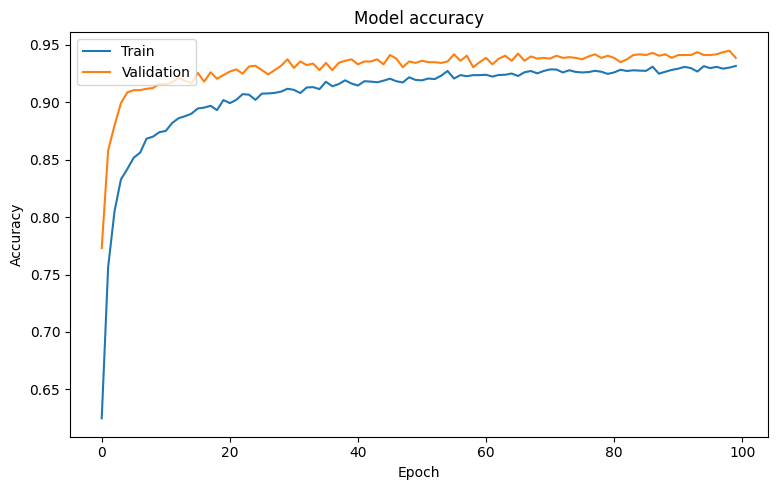

In [16]:
# Plot training & validation accuracy values
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

In [17]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')


63/63 [==============================] - 0s 1ms/step - loss: 0.2204 - accuracy: 0.9325
Test Accuracy: 0.9325000047683716


In [19]:
# Making predictions on new data
new_data = [[61.007023, 106.570495, 21.414754, 1]]  # Example data
new_data = scaler.transform(new_data)  # Normalize the data
predictions = model.predict(new_data)
predicted_label = le.inverse_transform([np.argmax(predictions)])  # Convert back to original label
print(f'Predicted Label: {predicted_label[0]}')


1/1 [==============================] - 0s 85ms/step
Predicted Label: Healthy


C:\Users\jawad2019.namal\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
